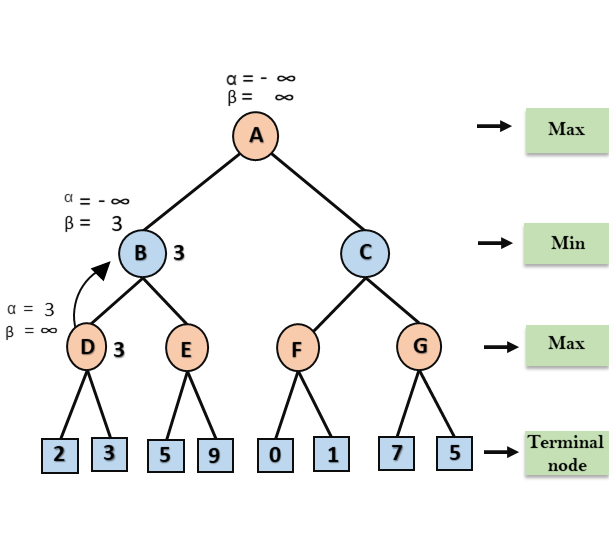
https://static.javatpoint.com/tutorial/ai/images/alpha-beta-pruning-step3.png

In [1]:
import copy

number_of_calls = 0

def Min(game, alpha = float('-inf'), beta = float('inf')):
    global number_of_calls
    number_of_calls += 1
    if game.end():
        return game.evaluate(), game
    
    current_best_value = float('inf')
    best_move = None
    for next_state in game.get_next_states():
        opponents_best_move_value, _ = Max(next_state, alpha, beta)
        if opponents_best_move_value < current_best_value:
            current_best_value = opponents_best_move_value
            best_move = next_state
            
        if current_best_value <= alpha:
            return current_best_value, next_state

        if current_best_value < beta:
            beta = current_best_value
            
    return current_best_value, best_move

def Max(game, alpha = float('-inf'), beta = float('inf')):
    global number_of_calls
    number_of_calls += 1
    if game.end():
        return game.evaluate(), game
    
    current_best_value = float('-inf')
    best_move = None
    for next_state in game.get_next_states():
        opponents_best_move_value, _ = Min(next_state, alpha, beta)
        if opponents_best_move_value > current_best_value:
            current_best_value = opponents_best_move_value
            best_move = next_state
            
        if current_best_value >= beta:
            return current_best_value, next_state

        if current_best_value > alpha:
            alpha = current_best_value
            
    return current_best_value, best_move


class XOState:
    empty = ' '
    def __init__(self):
        self.board = [
            [XOState.empty, XOState.empty, XOState.empty],
            [XOState.empty, XOState.empty, XOState.empty],
            [XOState.empty, XOState.empty, XOState.empty]
        ]
        self.curr_player = 'X'

        self.last_move = None
        self.move_count = 0

    def play_move(self, move):
        i, j = move[0], move[1]
        self.board[i][j] = self.curr_player
        self.curr_player = 'X' if self.curr_player == 'O' else 'O' 
        self.last_move = move
        self.move_count += 1

    def draw_board(self):
        print(' | '.join(self.board[0]))
        print(' | '.join(self.board[1]))
        print(' | '.join(self.board[2]))

    def get_next_states(self):
        for i in range(0,3):
            for j in range(0,3):
                if self.board[i][j] == XOState.empty:
                    next_state = copy.deepcopy(self)
                    next_state.play_move([i, j])
                    yield next_state

    def evaluate(self):
        winner = self.get_winner()
        result = 0
        if winner == 'X':
            result = 1
        elif winner == 'O':
            result = -1
        return result

    def get_winner(self):
        b = self.board

        # kolone
        for i in range(0,3):
            if b[0][i] != XOState.empty and b[0][i] == b[1][i] == b[2][i]:
                return b[0][i]

        # redovi
        for i in range(0,3):
            if b[i][0] != XOState.empty and b[i][0] == b[i][1] == b[i][2]:
                return b[i][0]

        # dijagonale
        if b[0][0] != XOState.empty and b[0][0] == b[1][1] == b[2][2]:
            return b[0][0]

        if b[0][2] != XOState.empty and b[0][2] == b[1][1] == b[2][0]:
            return b[0][2]

        return None

    def end(self):
        winner = self.get_winner()
        return winner is not None or self.move_count == 9

def get_move(func=None, game=None):
    if func is not None:
        _, state = func(game)
        return state.last_move
    else:
        move = input().split(',')
        return [int(move[0]), int(move[1])]



game = XOState()
game.draw_board()
while True:
    next_move = get_move() # [1,2]
    game.play_move(next_move)
    game.draw_board()
    if game.get_winner() == 'X':
        print('Player X won')
        break

    if game.end():
        print('Tie')
        break

    number_of_calls = 0
    next_move = get_move(Min, game)
    print('NUmber of calls: ', number_of_calls)
    game.play_move(next_move)
    game.draw_board()
    if game.get_winner() == 'O':
        print('Player O won')
        break


  |   |  
  |   |  
  |   |  
0,0
X |   |  
  |   |  
  |   |  
NUmber of calls:  2338
X |   |  
  | O |  
  |   |  
2,2
X |   |  
  | O |  
  |   | X
NUmber of calls:  318
X | O |  
  | O |  
  |   | X
2,1
X | O |  
  | O |  
  | X | X
NUmber of calls:  42
X | O |  
  | O |  
O | X | X
0,2
X | O | X
  | O |  
O | X | X
NUmber of calls:  5
X | O | X
  | O | O
O | X | X
1,0
X | O | X
X | O | O
O | X | X
Tie
